Let us see how each of these columns plays the role in analysis and establishing the relationship or how its related to customer profession , family size and annual income  by visualizing using Python . Lets start !!


In [133]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import PIL.Image # helps in loading images and visualization

In [2]:
# Reading the file using Pandas Library
df = pd.read_csv('CustomerAnalysis.csv')
# to show the first five rows
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


---

---

*    Plotting values on charts to establish the relationship between all attributes in the dataset and to find what all variable are dependent and what are independent of each other in the dataset.

---

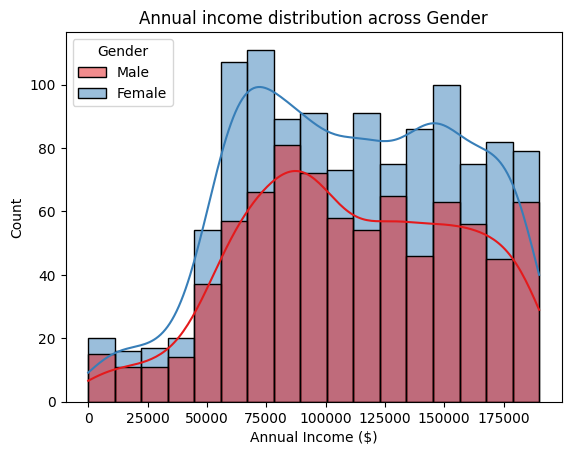

In [ ]:
# How does annual income change with gender? Lets check that with the following:
sns.histplot(data=df, x='Annual Income ($)', hue='Gender', kde=True, palette='Set1')
plt.title('Annual income distribution across Gender')
plt.show()

---

**Conclusion**

---

*     We can see that male gender has the higher mean annual income of around $110000.


---

*    Hence the gender with the lowest mean annual income is Female with an average income of $10000.






---



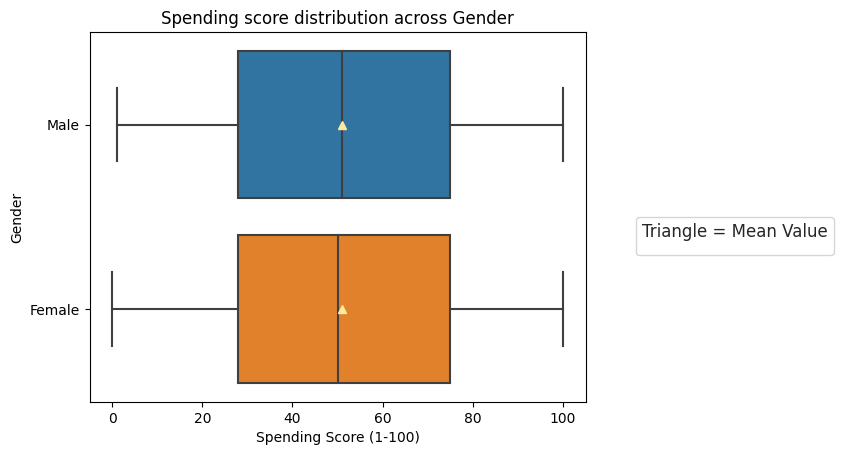

In [ ]:
# How does spending score vary by gender?
ax = sns.boxplot(data=df, x='Spending Score (1-100)', y='Gender', showmeans=True)
sns.set_theme(style="whitegrid", palette="RdYlBu")
plt.legend(bbox_to_anchor=(1.5, .5), loc='best', borderaxespad=0, title='Triangle = Mean Value',labels=[])
plt.title('Spending score distribution across Gender')
plt.show()

**Conclusion**

---

*   The gender with the highest mean spending score is Female with an average spending score of 51 and male with around 49.

---

*   So we can say that Female customers are more likely to shop because they have higer spending scores.

---

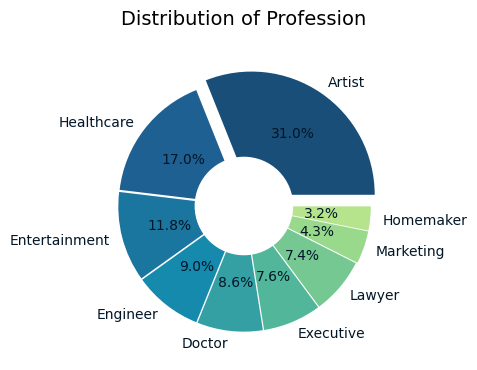

In [191]:
# Proportion each Profession has in the dataset
Profession_values= df['Profession'].value_counts().tolist()
Profession_names= df['Profession'].value_counts().index.tolist()
colors_pattern=['#184e77','#1e6091','#1a759f','#168aad','#34a0a4','#52b69a','#76c893','#99d98c','#b5e48c']
plt.figure(figsize=(4,4))
plt.title('Distribution of Profession',fontdict={"fontsize":14},pad=20)
plt.pie(Profession_values,labels=Profession_names,autopct='%1.1f%%'
       ,colors=colors_pattern,textprops={'color':'#011627','fontsize':10},
explode=[0.11,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03])
hole = plt.Circle((0, 0), 0.40, facecolor='white')
# Current Figure ( plt.gcf() )
# --> Current Axis ( gca() )
# --> add the hole
plt.gcf().gca().add_artist(hole)
plt.show()

**Conclusion**

---

*   The dataset tends to show the Artist count more with 31 % , means the shop has its maximum customer as Artist, followed by Healthcare's  Profession Customer with 17% of there total Customer .

---

*   Least count of Profession is Homemaker in the Customer Zone


---

In [140]:
# Displaying spending score for different age groups
# Create age groups (customize bins and labels as needed)
bins = [20, 30, 40, 50, 60, 70]
labels = ['Age Group 20-29', 'Age Group 30-39', 'Age Group 40-49', 'Age Group 50-59', 'Age Group 60-69']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels,
right=False)
# Calculate average spending score for each age group
avg_spending_by_age = df.groupby('Age_Group')['Spending Score (1-100)'].mean().reset_index()

# Plotting the radar chart
fig = px.line_polar(avg_spending_by_age, r='Spending Score (1-100)',
theta='Age_Group', line_close=True)
fig.update_layout(title_text = 'DISPLAYING SPENDING-SCORE FOR ALL AGE-GROUPS',
 polar=dict(
 radialaxis=dict(visible=True),
 ),showlegend=False)
fig.update_traces(fill='toself')
fig.show()


**Conclusion**

---

*   A dataset containing information on individuals' age and spending scores was obtained

---

*   The radar chart provides a unique view of how spending scores vary across different age groups.

---

*   Patterns such as higher spending scores in certain age ranges or variations in spending behavior become apparent through the visualization.

---

*   The radar chart is a powerful visual tool for conveying complex patterns in data, making it easier for stakeholders to grasp insights at a glance

---

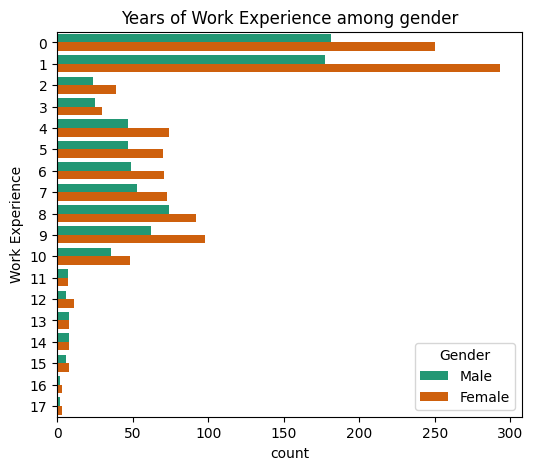

In [82]:
# Showing the distribution of work experience over gender
plt.figure(figsize=(6,5))
sns.countplot(data=df, y='Work Experience', hue='Gender',
              palette='Dark2',saturation=0.9)
plt.title('Years of Work Experience among gender')
plt.ylabel('Work Experience')
plt.show()

**Conclusion**

---

* The line plot illustrates the average work experience for both male and female individuals over a span of several years., revealing that 'Female' consistently exhibits the highest levels of work experience.

---

* This finding underscores the potential influence of gender on professional experience.

---

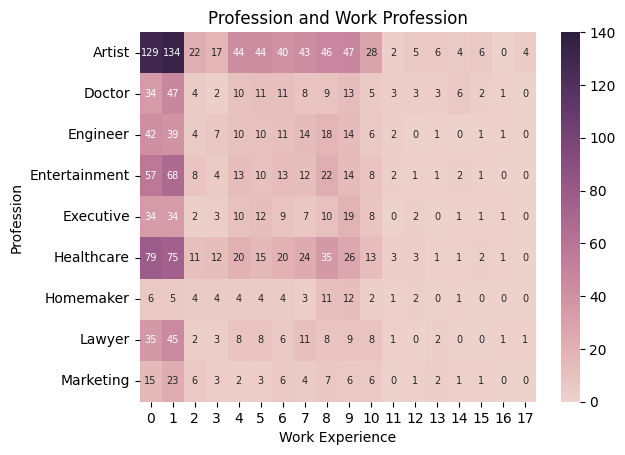

In [190]:
# Customers in which profession have least work experience
contingency_table = pd.crosstab(df['Profession'], df['Work Experience'])
plt.title('Profession and Work Profession')
sns.heatmap(contingency_table, cmap=sns.cubehelix_palette(as_cmap=True),fmt='d', annot=True,vmin=0,vmax=140,annot_kws={'size':7})
plt.show()


**Conclusion**

---

* The Customer having 'ARTIST' as there profession have the least work experience since the count of those customers are 129 customers in the dataset

---

* Longest years of work experience can be seen in Profession of Lawyers and Artist with the count of 1 and 4 respectively.

---

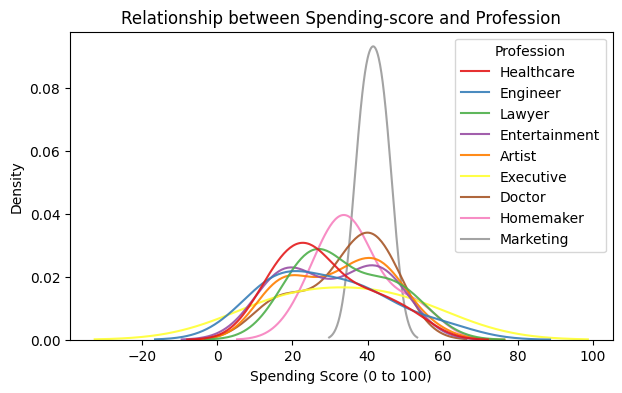

In [198]:
# Lets checkout the relationship between spending-score and profession
plt.figure(figsize=(7,4))
df['Spending Score']= df['Spending Score (1-100)'].value_counts(bins=70)
sns.kdeplot(data=df,x='Spending Score',hue='Profession',common_norm=False,fill=False, alpha=0.9,palette='Set1')
           # ,marker='o', markersize=2)
plt.title(label='Relationship between Spending-score and Profession')
plt.xlabel("Spending Score (0 to 100)")
plt.grid(False)
plt.show()



**Conclusion**

---

* While Executive tends to spend more as they have more spending score ranging between 0 to 100  , that is Executive 's Profession Customer  to buy product from the shop is max.

---

* The Customer having 'Marketing' as there profession have there spending score between 30 to 55 which is quiet moderated as compare to others, but can be considered as Regular Costumer as they have higher density means they will buy something  from shop that builds there score always between moderate range .

---


* The Profession such as Homemaker, Artist, Lawyer etc falls under the score range of less to moderate ie 20 to 30. Almost these profession customer have depicts there shopping behaviour and spending nature under the analysed range.
So need to have some more perks for these customers so that there spending score increases like adding more discounts for the one who lies under these profession.  

---

* The Customer in Healthcare Profession have least spending score , so we can conclude that they tends to shop less.

---


*  As a whole the good services should be given to Executive as there spending score is more and focus on products availiability for them should be more.This will not only increase the sales in the end but also will make them as as Regular Customer.


---




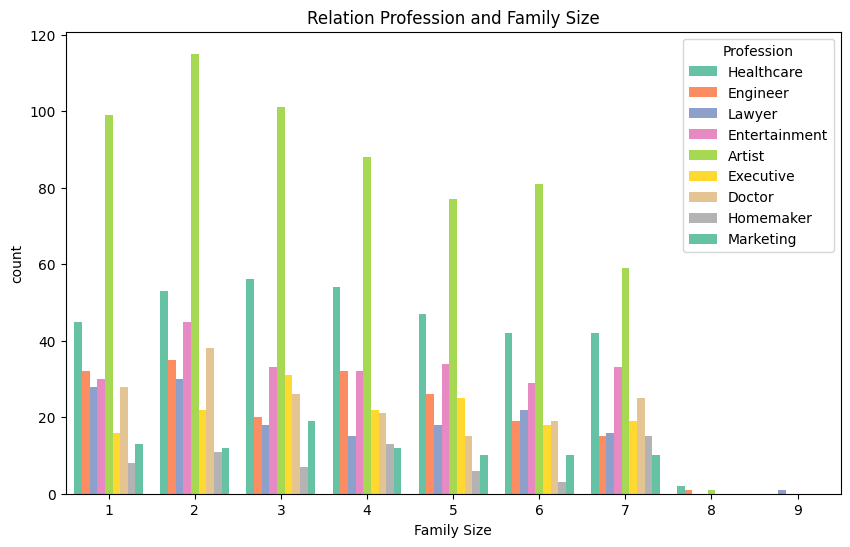

In [186]:
# How Profession varies as per the Family-Size?
plt.figure(figsize=(10,6))
plt.title('Relation Profession and Family Size')
sns.countplot(data=df,x='Family Size',hue='Profession',
	palette='Set2',saturation=3)
plt.show()


**Conclusion**

---

*   This graphs above indicates that the diversity in the types of professions across different family sizes.

---

*   Some Lawyers may have higher family size of upto 9 members
It's possible that the dataset contains fewer examples for certain family sizes.

---

*   Smaller family sizes (e.g., 1, 2, 3) may have a more focused set of professions like Engineers, Doctors etc

---

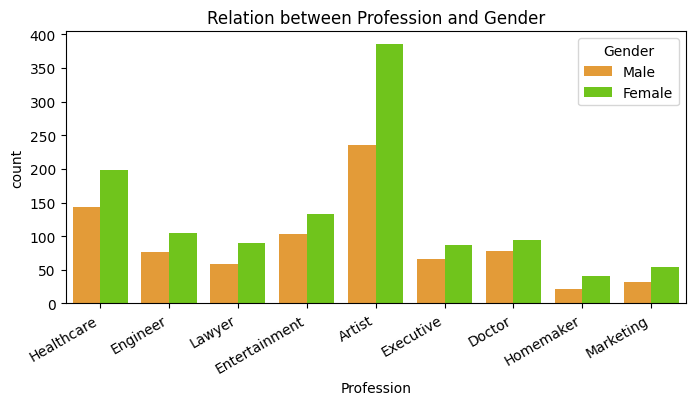

In [188]:
# Illustrating how the Profession  varies among Gender !

plt.figure(figsize=(8,4))
plt.title('Relation between Profession and Gender')
sns.countplot(data=df,x='Profession', hue='Gender',
              palette={'Female':'#70e000', 'Male':'#ff9f1c'})
plt.gcf().autofmt_xdate()
plt.grid(False)
plt.show()

**Conclusion**

---

* The plot illustrates the Profession for both male and female individuals over a span of several years. revealing that 'Female' are consistently higher in number among all professions.

---

* Specially in ATRIST we can see that there is a significantly higher number of females than Males.

---

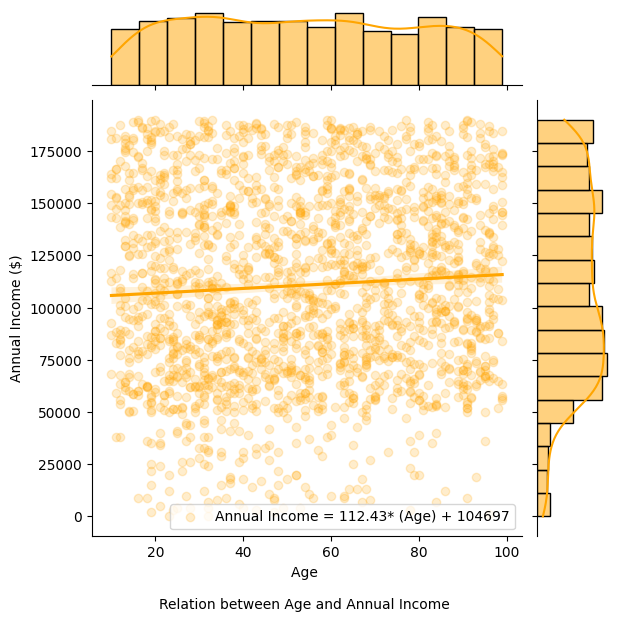

In [201]:
# How are Age and Annual Income related to each other ?
# What can we conclude ?


#plt.figure(figsize=(6,6))
sns.jointplot(data=df ,x= 'Age', y='Annual Income ($)',color='orange',kind='reg',scatter_kws={'alpha':0.2})
plt.legend(['Annual Income = 112.43* (Age) + 104697'])
plt.xlabel('Age ' '\n' '\n' 'Relation between Age and Annual Income ')

plt.grid(False)

plt.show()






**Conclusion**

---

* The Regression Line shows the Annual Income = 112.43*Age +104697 , which is linear relationship .Therefore the age and income are postively correlated to each other as we can see in graph slight inclination in Regression line for some point  

---

* Both variables tend to go up in response to one another but the relationship is not very strong.Later on the point no correlation as the age increases

---



**REFERENCES** :

*   https://proclusacademy.com/blog/customize_matplotlib_piechart/
*   https://www.askpython.com/python/examples/display-images-using-python
*   https://www.geeksforgeeks.org/hide-axis-borders-and-white-spaces-in-matplotlib/
*   https://stackoverflow.com/questions/67332015/how-can-i-add-title-to-this-radar-chart
*   https://plotly.com/python/radar-chart/
* https://zebrabi.com/guide/how-to-customize-radar-chart-in-python-matplotlib/  
*   https://matplotlib.org/stable/users/explain/colors/colormaps.html

* https://www.techtarget.com/searchbusinessanalytics/definition/customer-analytics

* https://hbr.org/2009/09/the-female-economy
* https://www.kaggle.com/datasets/datascientistanna/customers-dataset








In [199]:
!jupyter nbconvert --to html ProjectTeam_08\ \(1\).ipynb

[NbConvertApp] Converting notebook ProjectTeam_08 (1).ipynb to html
[NbConvertApp] Writing 1280655 bytes to ProjectTeam_08 (1).html
